# Pymaceuticals Inc.
---

### Analysis

Analysis of individual mouse data, particularly for Mouse ID l509 treated with Capomulin, reveals a downward trend in tumor volume over time. Additionally, data from multiple mice receiving Capomulin further supports the conclusion that this regimen effectively reduces tumor size, emphasizing its potential as a viable treatment option

The findings from the Mouse_metadata and Study_results collectively suggest that Capomulin is an effective treatment for reducing tumor volume, particularly when considering its relationship with mouse weight. These results warrant further investigation into the dosage and treatment conditions to ensure that conclusions drawn are reliable and can inform future research directions.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data_df = pd.merge(study_results, mouse_metadata, how='left', on = 'Mouse ID')   
# Display the data table for preview
combined_data_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_mice = combined_data_df['Mouse ID'].unique()
number_of_mice = len(number_mice)
number_of_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_data_df[combined_data_df[['Mouse ID', 'Timepoint']].duplicated() == True]
duplicate_mice_ID = duplicate_mice['Mouse ID'].unique()
duplicate_mice_ID

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID.
duplicate_mice_data = combined_data_df.loc[combined_data_df["Mouse ID"] == duplicate_mice_ID[0]]
duplicate_mice_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=combined_data_df.drop_duplicates(subset=["Mouse ID", "Timepoint"])
clean_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
Total_Number_of_mice = clean_df[("Mouse ID")].unique()
total_mice = len(Total_Number_of_mice)
total_mice

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
# Assemble the resulting series into a single summary DataFrame.
drug_regimen_data = clean_df.set_index(["Drug Regimen"])
group_data = drug_regimen_data.groupby("Drug Regimen")
drug_regi_mean = group_data["Tumor Volume (mm3)"].mean()
drug_regi_median = group_data["Tumor Volume (mm3)"].median()
drug_regi_var = group_data["Tumor Volume (mm3)"].var()
drug_regi_std = group_data["Tumor Volume (mm3)"].std()
drug_regi_sem = group_data["Tumor Volume (mm3)"].sem()
drug_df = pd.DataFrame({"Mean Tumor Volume":  drug_regi_mean,
                                 "Median Tumor Volume":  drug_regi_median,
                                 "Tumor Volume Variance":  drug_regi_var,
                                 "Tumor Volume Std. Dev.":  drug_regi_std,
                                 "Tumor Volume SEM":  drug_regi_sem})
drug_df


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
agg_drug_df=drug_regimen_data.groupby(["Drug Regimen"])[["Tumor Volume (mm3)"]].agg(["mean","median","var","std","sem"])
agg_drug_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mouse_total = clean_df.groupby(["Drug Regimen"]).count() ["Timepoint"]
mouse_total


Drug Regimen
Capomulin    230
Ceftamin     178
Infubinol    178
Ketapril     188
Naftisol     186
Placebo      181
Propriva     156
Ramicane     228
Stelasyn     181
Zoniferol    182
Name: Timepoint, dtype: int64

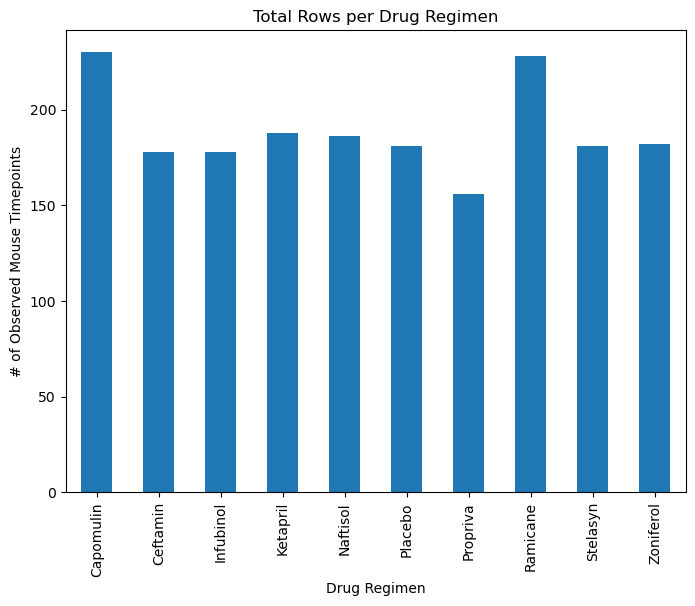

In [10]:
#barplot
mouse_total.plot(kind='bar', figsize=(8,6), title='Total Rows per Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.show()

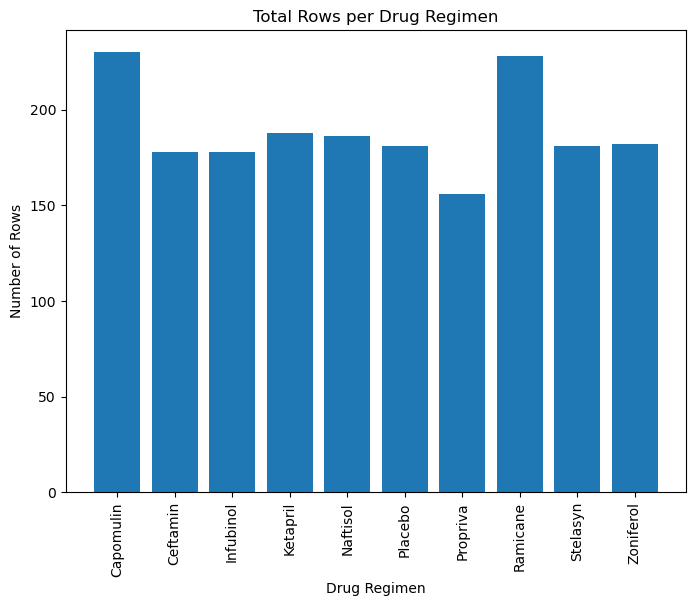

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.figure(figsize=(8,6))
plt.bar(mouse_total.index,mouse_total.values)
plt.title('Total Rows per Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Rows')
plt.xticks(rotation=90)
plt.show()

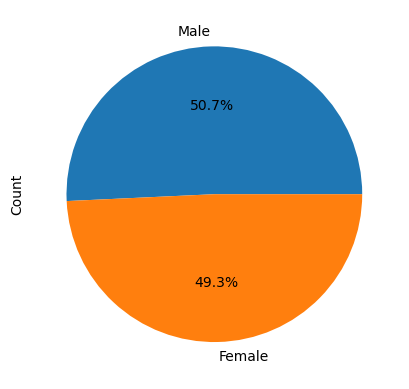

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
sex_count = clean_df["Sex"].value_counts()
sex_count
# Get the unique mice with their gender
Sex = {"Male","Female"}

# Make the pie chart
sex_count.plot(kind='pie', autopct='%1.1f%%', ylabel = "Count")
plt.show()

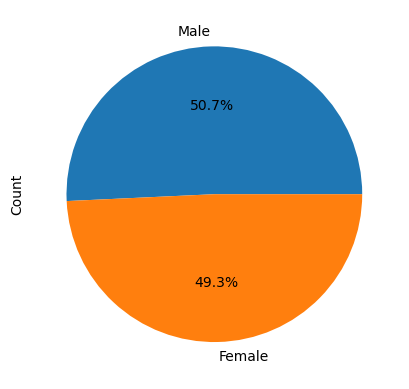

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
# Make the pie chart
sex_count = clean_df["Sex"].value_counts()
plt.ylabel("Count")
plt.pie(sex_count, labels=sex_count.index, autopct='%1.1f%%',)
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
tumor_column=clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")|
                        (clean_df["Drug Regimen"] == "Ramicane")|
                        (clean_df["Drug Regimen"] == "Infubinol")|
                        (clean_df["Drug Regimen"] == "Ceftamin") ]
# Start by getting the last (greatest) timepoint for each mouse
last_timepoint=tumor_column.groupby(["Drug Regimen","Mouse ID"]).last()
index_timepoint = last_timepoint.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
reduced_last_tp=index_timepoint[["Drug Regimen", "Tumor Volume (mm3)"]]
reduced_last_tp

capomulin_df = index_timepoint.loc[reduced_last_tp["Drug Regimen"] == "Capomulin"]
capomulin_df

ramicane_df = index_timepoint.loc[reduced_last_tp["Drug Regimen"] == "Ramicane"]
ramicane_df

infubinol_df = index_timepoint.loc[reduced_last_tp["Drug Regimen"] == "Infubinol"]
infubinol_df

ceftamin_df = index_timepoint.loc[reduced_last_tp["Drug Regimen"] == "Ceftamin"]
ceftamin_df

new_df = pd.DataFrame({"Capomulin": capomulin_df["Tumor Volume (mm3)"],
         "Ramicane": ramicane_df["Tumor Volume (mm3)"],
          "Infubinol": infubinol_df["Tumor Volume (mm3)"],
          "Ceftamin": ceftamin_df["Tumor Volume (mm3)"]})

new_df.head()


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,NaN,NaN,NaN
1,38.939633,NaN,NaN,NaN
2,30.485985,NaN,NaN,NaN
3,37.074024,NaN,NaN,NaN
4,40.159220,NaN,NaN,NaN


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
# Define treatments
treatment = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
tumor_vol_data = []

# Loop through each drug and get the tumor volume data for the max timepoint
for drug in treatment:
    drug_data = tumor_column.loc[tumor_column["Drug Regimen"] == drug]
    tumor_volume = drug_data.loc[drug_data['Timepoint'] == drug_data['Timepoint'].max()]['Tumor Volume (mm3)']
    tumor_vol_data.append(tumor_volume)

# Create lists to hold upper and lower quartiles
upperq_list = []
lowerq_list = []

# Calculate the IQR and determine outliers for each drug
for drug, tumor_vol in zip(treatment, tumor_vol_data):
    quartiles = tumor_vol.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    
    # Determine outliers
    outliers = tumor_vol[(tumor_vol < lower_bound) | (tumor_vol > upper_bound)]
    
    print(f"{drug} Potential Outliers: {outliers}")
    
    # Store quartiles for plotting if needed later
    upperq_list.append(upperq)
    lowerq_list.append(lowerq)

Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


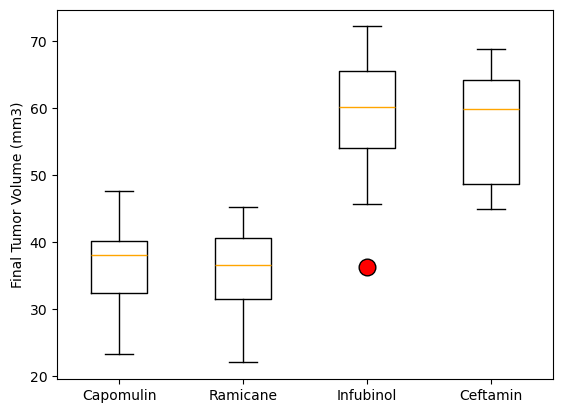

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.

fig1, ax1 = plt.subplots()
new_df.boxplot(ax=ax1, grid=False, 
               color=dict(boxes='k', whiskers='k', medians='orange'),
               flierprops=dict(marker='o', color='r', markerfacecolor='r', markersize=12))
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.show()

## Line and Scatter Plots

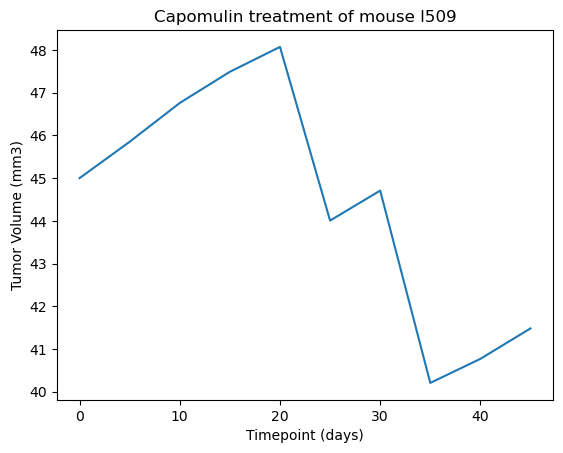

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin") & (clean_df["Mouse ID"] == "l509") ]
reduced_capomulin_df = capomulin_df[["Timepoint","Tumor Volume (mm3)" ]]
reduced_capomulin_df = reduced_capomulin_df.set_index(["Timepoint"])

#get values ready for plotting
timepoint = reduced_capomulin_df.index.values
tumor_vol = reduced_capomulin_df.values

#graph build and display
plt.plot(timepoint, tumor_vol)
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

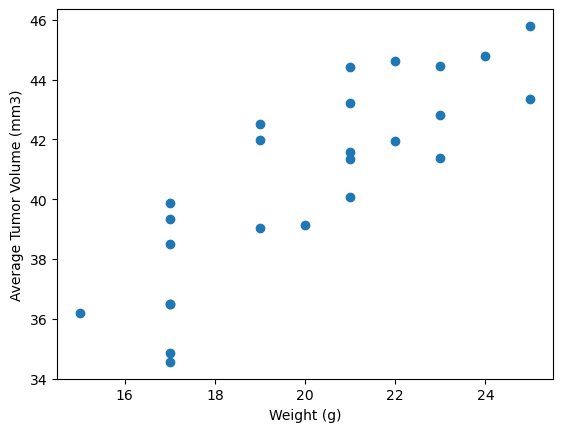

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
new_capomulin_df = clean_df.loc[(clean_df["Drug Regimen"] == "Capomulin")]
group_capomulin_df = new_capomulin_df.groupby("Mouse ID")

#find and store avg tumor vol for each weight
avg_tumor_vol = group_capomulin_df[("Tumor Volume (mm3)")].mean()
weight = group_capomulin_df["Weight (g)"].mean()
avg_capomulin_df = pd.DataFrame({"Weight (g)": weight,
                            "Tumor Volume (mm3)": avg_tumor_vol})
#graph build and display
plt.scatter(weight, avg_tumor_vol)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84
Linear regression equation: y = 0.95x + 21.55


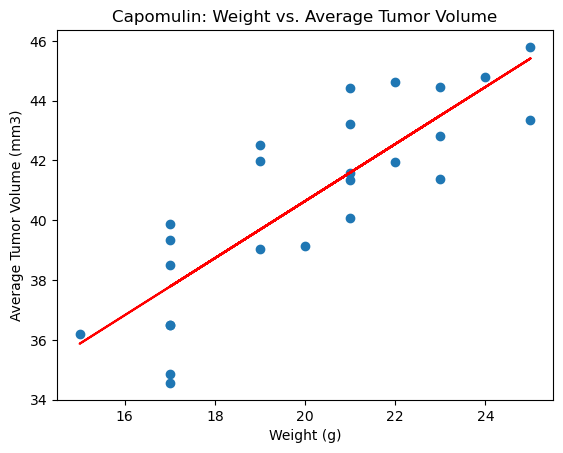

Mouse ID
b128    41.963636
b742    40.083699
f966    36.505973
g288    41.990097
g316    44.613344
i557    44.805810
i738    39.141053
j119    44.465236
j246    43.216925
l509    44.434474
l897    42.507261
m601    34.847470
m957    39.049816
r157    45.798970
r554    36.509212
r944    43.367364
s185    34.559143
s710    42.803733
t565    39.328725
u364    39.887495
v923    41.581595
w150    41.384825
w914    41.352452
x401    36.182040
y793    38.506829
Name: Tumor Volume (mm3), dtype: float64


In [19]:
# Calculate the correlation coefficient for mouse weight and average tumor volume
correlation = st.pearsonr(avg_capomulin_df["Weight (g)"], avg_capomulin_df["Tumor Volume (mm3)"])
print(f"The correlation between mouse weight and the average tumor volume is {round(correlation[0], 2)}")

# Perform linear regression using the average Capomulin data
slope, intercept, rvalue, pvalue, stderr = st.linregress(avg_capomulin_df["Weight (g)"], avg_capomulin_df["Tumor Volume (mm3)"])
print(f"Linear regression equation: y = {round(slope, 2)}x + {round(intercept, 2)}")

# Define the line equation for plotting
line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"

# Prepare data for plotting
x = avg_capomulin_df["Weight (g)"]
regress_values = slope * x + intercept  

# Build and display the scatter plot and regression line
plt.scatter(x, avg_capomulin_df["Tumor Volume (mm3)"], label="Data points")
plt.plot(x, regress_values, color="red", label=line_eq)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Capomulin: Weight vs. Average Tumor Volume")
plt.show()

# Optional: Calculate the average tumor volume for each mouse on Capomulin
avg_tumor_vol_per_mouse = group_capomulin_df["Tumor Volume (mm3)"].mean()
print(avg_tumor_vol_per_mouse)